# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
from scipy import stats;

# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

In [3]:
from scipy.stats import norm

r1 = norm.rvs(loc=50, scale=5, size=10)
r2 = norm.rvs(loc=50, scale=5, size=50)
r3 = norm.rvs(loc=50, scale=5, size=500)
r4 = norm.rvs(loc=50, scale=5, size=5000)

#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](../images/ch-1.png)

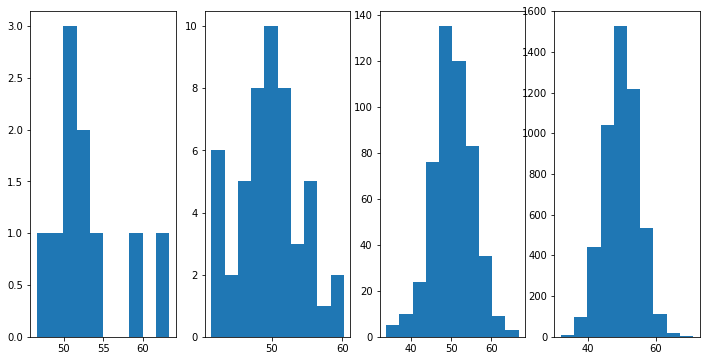

In [4]:
fig, ax = plt.subplots(1,4, figsize=(12,6))

bins = 20

ax[0].hist(r1)
ax[1].hist(r2)
ax[2].hist(r3)
ax[3].hist(r4)

plt.show()

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(12,6))

ax[0].hist(r1)
ax[1].hist(r2)
ax[2].hist(r3)
ax[3].hist(r4)
plt.show()

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

**Answer: The Central Limit Theorem claims that when the sample size increases, the sample distribution of its mean is getting closer and closer to a normal distribution. In this situation, the first figure has a sample of 10 and, from left to right, the sample size is increasing, with the last one on the right having a sample of 5.000. So, we can see that the right figure distritubtion approximates of a normal distribution, confirming the CLT.**

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

In [5]:
from scipy.stats import binom

n = 5
p = 0.15
x = range(n)

dist = stats.binom(n, p)

#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](../images/ch-2.png)

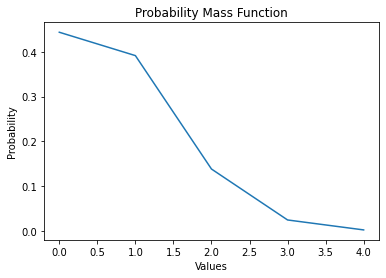

In [6]:
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))

plt.title('Probability Mass Function')
plt.xlabel('Values')
plt.ylabel('Probability')

plt.show()

#### Step 3: Explain what you observe from the plot above.

**Answer: In probability theory and statistics, the mass probability function is a function that associates a probability value with each possible occurrence of a discrete random variable. The sum of the probability values is 1 (100%). We can see that if the number of people that has to click increases, the probability decreases.**

#### Step 4: Now plot PMF with 50, 500, and 5000 visitors.
To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

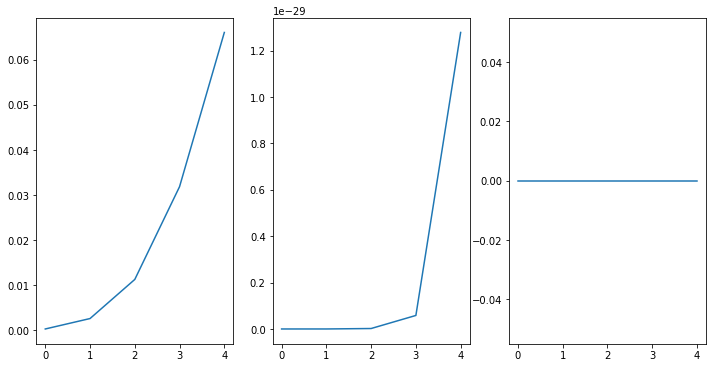

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(12,6))

sample_size = [50, 500, 5000]

for i in range(3):
    dist = binom(p=0.15, n=sample_size[i])
    plt.sca(axes[i])
    plt.plot(x, dist.pmf(x))
    
plt.show()

#### Step 5: What did you notice from the distribution plots? Comment your findings.

**Answer: When the sample size increases, the distribution changes, because the format of the binomial distribution depends on the size of this sample.**

# Challenge 3
#### Step 1: Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

**The Poisson distribution represents discrete random variables and expresses the probability of event occurrences over a period of time, if these events occur independently of the last event (fixed interval of time or space).**

#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [10]:
mean = 300
expectancy = 320

stats.poisson.pmf(expectancy, mean)

0.011612348610402475

#### Step 3: What is the probability of getting 60 visits?

In [11]:
mean = 300
expectancy = 60

stats.poisson.pmf(expectancy, mean)

2.622743762294515e-64

#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [12]:
arr = [dist.pmf(x) for x in range(1000)]


#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](../images/ch-3.png)

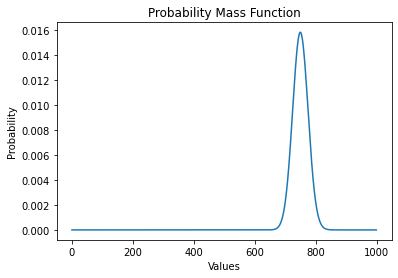

In [13]:
plt.plot(arr)

plt.title('Probability Mass Function')
plt.xlabel('Values')
plt.ylabel('Probability')

plt.show()

# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [14]:
mean = 35
std = 8
random_sample = 200
x = std/np.sqrt(random_sample)

p = stats.norm.cdf(35, mean, x) - stats.norm.cdf(30, mean, x)
p

0.5

#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [16]:
time_package = 115*60 / 200

1  - stats.norm.cdf(time_package, mean, x)

0.8116204410942089

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X → N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [17]:
1 - norm.cdf(300,200,40)

0.006209665325776159

#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [18]:
norm.cdf(240,200,40) - norm.cdf(160,200,40)

0.6826894921370859

#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [19]:
norm.cdf(150,200,40) 

0.10564977366685535

#### Step 4: Find the probability that the monthly sales exceed 3000.

In [20]:
1 - norm.cdf(3000,200,40)


0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [21]:
mean = 4
stats.poisson.cdf(0,mean)

0.018315638888734182

#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [22]:
stats.poisson.cdf(1,mean)

0.0915781944436709

#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [23]:
stats.poisson.cdf(6,mean) - stats.poisson.cdf(2,mean)

0.6512227160438819

#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

In [25]:
1 - stats.poisson.cdf(2,mean/2)

0.3233235838169366